# Meteorite Landings EDA

![Alt text](https://1000logos.net/wp-content/uploads/2017/03/NASA-Logo.jpg)

[Data source](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh/about_data)

# Summary
The overall goal of this project is to practice exploratory data analysis (EDA), data cleaning and building data visualizations from the cleaned dataset in Python using the pandas, seaborn and matplotlib libraries in Python. An [interactive Tableau dashboard](https://public.tableau.com/app/profile/jasmine.chia/viz/Meteorite_Landings_V3/Dashboard1) has also been built using the cleaned dataset.

# Findings from data visualisations done using Seaborn and matplotlib
1. Most common type of meteorites to land are Ordinary chondrites, at 33547 instances, while Pallasites are the least commonly recorded at only 69 instances.
2. Out of all the types of meteorites, non-magnetic iron meteorite have the heaviest average mass of 598.76kg, while lunar meteorites are the lightest at an average mass of 0.35kg.
3. The continent with the highest number of recorded meteorite landings is Antartica, at 22097, while Europe is the continent with the least number of recorded meteorite landings at 519.
4. The year 1979 saw the highest number of recorded meteorite landings at 3044 recorded instances

To further explore and interact with the data, please refer to the [interactive Tableau dashboard](https://public.tableau.com/app/profile/jasmine.chia/viz/Meteorite_Landings_V3/Dashboard1)

And now let's get into the code

# Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Viewing and describing dataset

In [2]:
df = pd.read_csv('/Users/jasmine/Documents/DA_DS_Projects/P_CS_meteorite/Meteorite_Landings.csv')
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [3]:
df.describe()

,id,mass (g),year,reclat,reclong
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


## Check for duplicates and null values

In [5]:
df.duplicated().sum() #no duplicated data in this dataset

0

We have confirmed that there are no duplicated values in the dataset and that all values are unique. The next step is to go ahead and clean up the null values in the dataset.

In [6]:
df.isnull().sum() #returns the missing values in the dataset

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

Let's go ahead and remove the null values for mass and year since it is unlikely that we can find out and fill these values in manually, besides these null values only make up 0.89% of the dataset so we can go ahead and drop them.

In [7]:
df.dropna(subset=['mass (g)', 'year'], inplace=True)
print(df.isnull().sum())

name              0
id                0
nametype          0
recclass          0
mass (g)          0
fall              0
year              0
reclat         7195
reclong        7195
GeoLocation    7195
dtype: int64


In [8]:
#Check
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


We are down to 45310 rows from the original 45716 rows of data after removing the rows which contained null values for the mass and year columns.

In [9]:
#Description of the dataset after rows with null values in the 'mass (g)' and 'year' columns are dropped
pd.set_option('display.float_format', lambda x: '%.2f' % x)
desc_after_drop = df.describe()
desc_after_drop

,id,mass (g),year,reclat,reclong
count,45310.00,45310.00,45310.00,38115.00,38115.00
mean,26805.35,13314.97,1991.98,-39.60,61.31
std,16834.90,576720.42,23.92,46.18,80.78
min,1.00,0.00,860.00,-87.37,-165.43
25%,12649.25,7.12,1987.00,-76.72,0.00
50%,24165.50,32.10,1998.00,-71.50,35.67
75%,40526.75,200.00,2003.00,0.00,157.17
max,57458.00,60000000.00,2101.00,81.17,178.20


I would also like to change the units of the mass column since from the description above, the highest value is at 60 000 000g which does not make sense

In [10]:
#Rename the columns first
df.rename(columns={'mass (g)': 'mass(kg)'}, inplace=True)

#convert mass from grams to kilograms
df['mass(kg)'] = df['mass(kg)']/1000
df

,name,id,nametype,recclass,mass(kg),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,0.02,Fell,1880.00,50.77,6.08,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,0.72,Fell,1951.00,56.18,10.23,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107.00,Fell,1952.00,54.22,-113.00,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1.91,Fell,1976.00,16.88,-99.90,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,0.78,Fell,1902.00,-33.17,-64.95,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,0.17,Found,1990.00,29.04,17.02,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",0.05,Found,1999.00,13.78,8.97,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,0.00,Found,1939.00,49.25,17.67,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2.17,Found,2003.00,49.79,41.50,"(49.78917, 41.5046)"


The next step is to take a closer look at the 7195 counts of null values in the 'reclat', 'reclong' and 'GeoLocation' columns.

In [11]:
geo_null_rows = df[df['reclat'].isnull() | df['reclong'].isnull() | df['GeoLocation'].isnull()]
geo_null_rows

,name,id,nametype,recclass,mass(kg),fall,year,reclat,reclong,GeoLocation
147,Bulls Run,5163,Valid,Iron?,2.25,Fell,1964.00,NaN,NaN,NaN
208,Clohars,5383,Valid,L4,0.05,Fell,1822.00,NaN,NaN,NaN
409,Jalanash,12068,Valid,Ureilite,0.70,Fell,1990.00,NaN,NaN,NaN
414,Jemlapur,12079,Valid,L6,0.45,Fell,1901.00,NaN,NaN,NaN
520,Cumulus Hills 04075,32531,Valid,Pallasite,0.01,Found,2003.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
44000,Yamato 981086,37708,Valid,H4,0.01,Found,1998.00,NaN,NaN,NaN
44001,Yamato 981090,37712,Valid,H4,0.01,Found,1998.00,NaN,NaN,NaN
45589,Yamato 984028,40648,Valid,Martian (shergottite),0.01,Found,1998.00,NaN,NaN,NaN
45660,Yambo no. 2,30346,Valid,L3,0.00,Found,1975.00,NaN,NaN,NaN


From the initial view of the dataset using the .head() function and from the above preview of the null rows, it can be observed that the values in the 'reclat', 'reclong' and 'GeoLocation' columns are related. For instance, if the value in the 'reclat' column is 50.775 and the corresponding value in the 'reclong' column is 6.08333 in the same row, the value reflected in the 'GeoLocation' column will be (50.775, 6.0833). Similarly, if the value in the 'reclat' column is NaN and the corresponding value in the 'reclong' column is NaN in the same row, the value reflected in the 'GeoLocation' column will be NaN. 

This means that we can go ahead and drop the GeoLocation column. If for any reason it is needed later on, we can always create a new column and append the concatenated values from the 'reclat' and 'reclong' columns.

Additionally, since there is no way to certainly figure out the missing values, I have decided to go ahead and drop them. I have another version of the project where I chose to impute the missing values with the median and mean, but for this version, I have opted to remove them.

In [12]:
#Drop the GeoLocation column
df.drop('GeoLocation', axis=1, inplace=True)

In [13]:
#Check
df.head()

,name,id,nametype,recclass,mass(kg),fall,year,reclat,reclong
0,Aachen,1,Valid,L5,0.02,Fell,1880.00,50.77,6.08
1,Aarhus,2,Valid,H6,0.72,Fell,1951.00,56.18,10.23
2,Abee,6,Valid,EH4,107.00,Fell,1952.00,54.22,-113.00
3,Acapulco,10,Valid,Acapulcoite,1.91,Fell,1976.00,16.88,-99.90
4,Achiras,370,Valid,L6,0.78,Fell,1902.00,-33.17,-64.95


In [14]:
#Drop null values from 'reclat' and 'reclong' columns
df.dropna(subset=['reclat', 'reclong'], inplace=True)
print(df.isnull().sum())

name        0
id          0
nametype    0
recclass    0
mass(kg)    0
fall        0
year        0
reclat      0
reclong     0
dtype: int64


We no longer have any null values in the dataset. The next step I would like to do is to classify each of the geolocation coordinates into a new column called 'continent'.

To do so, I searched for the esitimated latitude and longitude range of each ontinent on google maps before writing them into a function

In [15]:
def get_continent(latitude, longitude):
    continents = {
        'North America': {'latitude_range': (7, 85), 'longitude_range': (-179, -20)},
        'South America': {'latitude_range': (-55, 12), 'longitude_range': (-81, -35)},
        'Europe': {'latitude_range': (35, 72), 'longitude_range': (-25, 65)},
        'Africa': {'latitude_range': (-35, 37), 'longitude_range': (-17, 51)},
        'Asia': {'latitude_range': (-11, 80), 'longitude_range': (25, 180)},
        'Oceania': {'latitude_range': (-56, -10), 'longitude_range': (112, 180)},
        'Antartica': {'latitude_range': (-90, -60), 'longitude_range': (-180, 180)}
    }

    for continent, boundary in continents.items():
        lat_range = boundary['latitude_range']
        lon_range = boundary['longitude_range']
        if lat_range[0] <= latitude <= lat_range[1] and lon_range[0] <= longitude <= lon_range[1]:
            return continent

    return "Unknown"

In [16]:
#Append to new column
df['continent'] = df.apply(lambda row: get_continent(row['reclat'], row['reclong']), axis=1)
df.head()

,name,id,nametype,recclass,mass(kg),fall,year,reclat,reclong,continent
0,Aachen,1,Valid,L5,0.02,Fell,1880.00,50.77,6.08,Europe
1,Aarhus,2,Valid,H6,0.72,Fell,1951.00,56.18,10.23,Europe
2,Abee,6,Valid,EH4,107.00,Fell,1952.00,54.22,-113.00,North America
3,Acapulco,10,Valid,Acapulcoite,1.91,Fell,1976.00,16.88,-99.90,North America
4,Achiras,370,Valid,L6,0.78,Fell,1902.00,-33.17,-64.95,South America


In [17]:
df["continent"].value_counts()

continent
Antartica        22097
Africa            9028
Asia              3458
North America     1816
Oceania            643
Europe             536
South America      534
Unknown              3
Name: count, dtype: int64

In [18]:
#Final check for null values before the next step of logical checking
df.isnull().sum()

name         0
id           0
nametype     0
recclass     0
mass(kg)     0
fall         0
year         0
reclat       0
reclong      0
continent    0
dtype: int64

Since there are no null values in the dataset, the next step is to proceed with the logical testing of the dataset and to clean up values that violate logic.

# Logical testing

## Mass

Since we are dealing mass, it has to be a positive value greater than 0. Let's go ahead and check if the values in the mass column fulfills that criteria.

In [19]:
#Checking mass column
mass_errors = df[df['mass(kg)'] <= 0]
mass_errors

,name,id,nametype,recclass,mass(kg),fall,year,reclat,reclong,continent
12640,Gove,52859,Relict,Relict iron,0.00,Found,1979.00,-12.26,136.84,Oceania
25557,Miller Range 090478,55953,Valid,CO3,0.00,Found,2009.00,0.00,0.00,Africa
31061,Österplana 048,56147,Relict,Relict OC,0.00,Found,2004.00,58.58,13.43,Europe
31062,Österplana 049,56148,Relict,Relict OC,0.00,Found,2012.00,58.58,13.43,Europe
31063,Österplana 050,56149,Relict,Relict OC,0.00,Found,2003.00,58.58,13.43,Europe
31064,Österplana 051,56150,Relict,Relict OC,0.00,Found,2006.00,58.58,13.43,Europe
31065,Österplana 052,56151,Relict,Relict OC,0.00,Found,2006.00,58.58,13.43,Europe
31066,Österplana 053,56152,Relict,Relict OC,0.00,Found,2002.00,58.58,13.43,Europe
31067,Österplana 054,56153,Relict,Relict OC,0.00,Found,2005.00,58.58,13.43,Europe
31068,Österplana 055,56154,Relict,Relict OC,0.00,Found,2008.00,58.58,13.43,Europe


The above rows can be removed since a meteorite cannot possibly weigh 0g.

Let's go ahead and remove them

In [20]:
# Remove rows where mass is 0g
df.drop(df[df['mass(kg)'] == 0].index, inplace=True)

In [21]:
#Check
df[df['mass(kg)'] <= 0].count()

name         0
id           0
nametype     0
recclass     0
mass(kg)     0
fall         0
year         0
reclat       0
reclong      0
continent    0
dtype: int64

The above shows that we have successfully removed the rows where 'Mass (g)' was recorded as 0.

We can now move on to the next step which is to conduct a logical check on the year column.

## Year

The dataset was obtained in 2024, so logically, there should not be any values that exceed 2024 in the year column. Let's go ahead and check out the year column.

In [22]:
#Checking year column
year_errors = df[df['year'] > 2024]
year_errors

,name,id,nametype,recclass,mass(kg),fall,year,reclat,reclong,continent
30682,Northwest Africa 7701,57150,Valid,CK6,0.06,Found,2101.00,0.00,0.00,Africa


There happens to be one entry where the year is greater than 2024. A quick search on google verifies that it is indeed an entry that was wrongly logged. The correct year should be 2010, so let's go ahead and change it.
[source](https://www.lpi.usra.edu/meteor/metbull.php?code=57150)

In [23]:
# modify value in the year column where id is 57150
df.loc[df.id == 57150, 'year'] = 2010

In [24]:
#Check
df[df['year'] > 2024].count()

name         0
id           0
nametype     0
recclass     0
mass(kg)     0
fall         0
year         0
reclat       0
reclong      0
continent    0
dtype: int64

Now that the year value is corrected, we can proceed with the next step which is to reclassify the variables under the 'recclass' column. This requires some understanding of how meteorites are classified.

# Viewing the values under the "recclass" variable

In [25]:
df["recclass"].value_counts()

recclass
L6                7519
H5                6243
H6                3898
H4                3880
L5                3264
                  ... 
H4(?)                1
EL4/5                1
L5-7                 1
H/L3.9               1
Mesosiderite-C       1
Name: count, Length: 420, dtype: int64

From the above, we can see that there are 457 unique classifications for meteorites, and they are quite specific. For ease of understanding and representation of the data, there is no need for the classifications to be this specific, hence I will reclassify them using a more general classification instead. The following describes the new classification for which the original classification will be replaced by.

In [26]:
#Viewing all the different classifications sorted alphabetically used in the 'recclass' column in the dataset.
recclass_counts_sorted = df["recclass"].value_counts().sort_index()
pd.set_option('display.max_rows', None)
recclass_counts_sorted

recclass
Acapulcoite                     37
Acapulcoite/Lodranite            5
Acapulcoite/lodranite            1
Achondrite-prim                  3
Achondrite-ung                  36
Angrite                         10
Aubrite                         53
Aubrite-an                       5
Brachinite                      23
C                                8
C1/2-ung                         1
C2                               1
C2-ung                          13
C3-ung                          10
C3.0-ung                         1
C4                               2
C4-ung                           3
C4/5                             1
C5/6-ung                         1
C6                               2
CB                               6
CBa                              4
CBb                              4
CH/CBb                           1
CH3                             19
CI1                              7
CK                               1
CK3                              7
CK3-an     

# New classifications
* **Carbonaceous chondrite**
    * Includes the following: C, CI, CM-CO, CM, CO, CV-CK, CV, CV-oxA, CV-oxB, CV-red, CK, CR, CH, CB, CBa, CBb
* **Ordinary chondrite**
    * Includes the following: H, L, LL
* **Enstatite chondrite**
    * Includes the following: EH, EL
* **Other chondrite**
    * Includes the following: R, K
* **Primitive achondrite**
    * Includes the following: Acapulocite, Lodranite, Winonaite
* **Asteroidal achondrites**
    * Includes the following: HED meteorite, Howardite, Eucrite, Diogenite, Angrite, Aubrite, Ureilite, Brachinite
* **Lunar meteorite**
* **Martian meteorite**
    * Also known as SNC meteorites
    * Includes the following: Shergottites, Nakhites, Chassignites, Other main Martian meteorites
* **Pallasites**
    * Includes the following: Main group pallasites, Eagle station pallasite grouplet, Pyroxene pallasite grouplet
* **Magnetic iron meteorite**
    * Includes the following: IC, IIAB, IIC, IID, IIF, IIG, IIIAB, IIIE, IIIF, IVA, IVB
* **Non-magnetic iron meteorite**
    * Includes the following: IAB iron meteorite "complex" or clan (formerly groups IAB and IIICD), IAB main group, Udei Station grouplet, Pitts grouplet, sLL (low Au, Low Ni) subgroup, sLM (low Au, Medium Ni) subgroup, sLH (low Au, high Ni) subgroup, sHL (high Au, Low Ni) subgroup, sHH (high Au, high Ni) subgroup, IIE iron meteorite group
    * IAB, IIE, IIICD, SLL, sLM, sLH, sHL, sHH
* **Mesosiderite**
* **Unknown grouping**
    * Includes meteorite which classes are not explicitly clear which group they belong to 

In [27]:
#new classification of Carbonaceous chondrite
df.recclass.replace(['C','C1/2-ung','C2','C2-ung','C3-ung','C3.0-ung','C3/4-ung','C4','C4-ung','C4/5','C5/6-ung','C6','CB','CBa','CBb','CH/CBb','CH3','CH3 ','CI1','CK',
                   'CK3','CK3-an','CK3.8','CK3/4','CK4','CK4-an','CK4/5','CK5','CK5/6','CK6','CM','CM-an','CM1','CM1/2','CM2','CM2-an','CO3','CO3 ','CO3.0','CO3.1','CO3.2','CO3.3',
                   'CO3.4','CO3.5','CO3.6','CO3.7','CO3.8','CR','CR-an','CR1','CR2','CR2-an','CR7','CV2','CV3','CV3-an'], value='Carbonaceous chondrite', inplace=True)

In [28]:
#New classification of Ordinary chondrite
df.recclass.replace(['H','H(5?)','H(?)4','H(L)3','H(L)3-an','H-an','H-imp melt','H-melt breccia','H-melt rock','H-metal','H/L3','H/L3-4','H/L3.5','H/L3.6',
                    'H/L3.7','H/L3.9','H/L4','H/L4-5','H/L5','H/L6','H/L~4','H3','H3 ','H3-4','H3-5','H3-6','H3-an','H3.0','H3.0-3.4','H3.05','H3.1',
                    'H3.10','H3.2','H3.2-3.7','H3.2-6','H3.2-an','H3.3','H3.4','H3.4-5','H3.4/3.5','H3.5','H3.5-4','H3.6','H3.6-6','H3.7','H3.7-5','H3.7-6',
                    'H3.7/3.8','H3.8','H3.8-4','H3.8-5','H3.8-6','H3.8-an','H3.8/3.9','H3.8/4','H3.9','H3.9-5','H3.9-6','H3.9/4','H3/4','H4','H4 ','H4(?)',
                    'H4-5','H4-6','H4-an','H4-melt breccia','H4/5','H4/6','H5','H5 ','H5-6','H5-7','H5-an','H5-melt breccia','H5/6','H6','H6 ','H6-melt breccia',
                    'H6/7','H7','H?','H~4','H~4/5','H~5','H~6','L','L(?)3','L(H)3','L(LL)3','L(LL)3.05','L(LL)3.5-3.7','L(LL)5','L(LL)6','L(LL)~4','L-imp melt',
                    'L-melt breccia','L-melt rock','L-metal','L/LL','L/LL(?)3','L/LL-melt rock','L/LL3','L/LL3-5','L/LL3-6','L/LL3.10','L/LL3.2','L/LL3.4',
                    'L/LL3.5','L/LL3.6/3.7','L/LL4','L/LL4-6','L/LL4/5','L/LL5','L/LL5-6','L/LL5/6','L/LL6','L/LL6-an','L/LL~4','L/LL~5','L/LL~6','L3','L3-4',
                    'L3-5','L3-6','L3-7','L3-melt breccia','L3.0','L3.0-3.7','L3.0-3.9','L3.00','L3.05','L3.1','L3.10','L3.2','L3.2-3.5','L3.2-3.6','L3.3',
                    'L3.3-3.5','L3.3-3.6','L3.3-3.7','L3.4','L3.4-3.7','L3.5','L3.5-3.7','L3.5-3.8','L3.5-3.9','L3.5-5','L3.6','L3.6-4','L3.7','L3.7-3.9',
                    'L3.7-4','L3.7-6','L3.7/3.8','L3.8','L3.8-5','L3.8-6','L3.8-an','L3.9','L3.9-5','L3.9-6','L3.9/4','L3/4','L4','L4 ','L4-5','L4-6','L4-an',
                    'L4-melt breccia','L4-melt rock','L4/5','L5','L5 ','L5-6','L5-7','L5-melt breccia','L5/6','L6','L6 ','L6-melt breccia','L6-melt rock','L6/7',
                    'L7','LL','LL(L)3','LL-imp melt','LL-melt breccia','LL-melt rock','LL3','LL3-4','LL3-5','LL3-6','LL3.0','LL3.00','LL3.05','LL3.1','LL3.1-3.5',
                    'LL3.10','LL3.15','LL3.2','LL3.3','LL3.4','LL3.5','LL3.6','LL3.7','LL3.7-6','LL3.8','LL3.8-4','LL3.8-6','LL3.9','LL3.9/4','LL3/4','LL4',
                    'LL4-5','LL4-6','LL4/5','LL4/6','LL5','LL5-6','LL5-7','LL5/6','LL6','LL6 ','LL6(?)','LL6-an','LL6-melt breccia','LL6/7','LL7','LL7(?)',
                    'LL<3.5','LL~3','LL~4','LL~4/5','LL~5','LL~6','L~3','L~4','L~4-6','L~5','L~6','OC','OC3'], value='Ordinary chondrite', inplace=True)

In [29]:
#New classification of Enstatite chondrite
df.recclass.replace(['E','E-an','E3','E3-an','E4','E5','E5-an','E6','EH','EH-imp melt','EH3','EH3/4-an','EH4','EH4/5','EH5','EH6','EH6-an','EH7','EH7-an',
                    'EL-melt rock','EL3','EL3/4','EL4','EL4/5','EL5','EL6','EL6 ','EL6/7','EL7'], value='Enstatite chondrite', inplace=True)

In [30]:
#New classification of Other chondrite
df.recclass.replace(['Chondrite-ung','K','K3','R','R3','R3-4','R3-5','R3-6','R3.4','R3.5-4','R3.5-6','R3.6','R3.7','R3.8','R3.8-5','R3.8-6','R3.9','R3/4','R4','R4/5','R5','R6'], 
                    value='Other chondrite', inplace=True)

In [31]:
#New classification of Primitive achondrite
df.recclass.replace(['Acapulcoite','Acapulcoite/Lodranite','Acapulcoite/lodranite','Achondrite-prim','Achondrite-ung','Lodranite','Lodranite-an','Winonaite'], 
                    value='Primitive achondrite', inplace=True)

In [32]:
#New classification of Asteroidal achondrite
df.recclass.replace(['Angrite','Aubrite','Aubrite-an','Brachinite','Diogenite','Diogenite-an','Diogenite-olivine','Diogenite-pm','Eucrite','Eucrite-Mg rich','Eucrite-an',
                     'Eucrite-br','Eucrite-cm','Eucrite-mmict','Eucrite-pmict','Eucrite-unbr','Howardite','Howardite-an','Ureilite','Ureilite-an','Ureilite-pmict'],
                    value='Asteroidal achondrite', inplace=True)

In [33]:
#New classification of Lunar meteorite
df.recclass.replace(['Lunar','Lunar (anorth)','Lunar (bas. breccia)','Lunar (bas/anor)','Lunar (bas/gab brec)','Lunar (basalt)','Lunar (feldsp. breccia)','Lunar (gabbro)',
                     'Lunar (norite)'], value='Lunar meteorite', inplace=True)

In [34]:
#New classification of Martian meteorite
df.recclass.replace(['Martian','Martian (OPX)','Martian (basaltic breccia)','Martian (chassignite)','Martian (nakhlite)','Martian (shergottite)'], 
                    value='Martian meteorite', inplace=True)

In [35]:
#New classification of Pallasite
df.recclass.replace(['Pallasite','Pallasite, PES','Pallasite, PMG','Pallasite, PMG-an','Pallasite, ungrouped'], value='Pallasite', inplace=True)

In [36]:
#New classification of Magnetic iron meteorite
df.recclass.replace(['Iron','Iron, IC','Iron, IC-an','Iron, IIAB','Iron, IIAB-an','Iron, IIC','Iron, IID','Iron, IID-an','Iron, IIF','Iron, IIG','Iron, IIIAB',
                     'Iron, IIIAB-an','Iron, IIIAB?','Iron, IIIE','Iron, IIIE-an','Iron, IIIF','Iron, IVA','Iron, IVA-an','Iron, IVB','Iron, ungrouped'], 
                    value='Magnetic iron meteorite', inplace=True)

In [37]:
#New classification of Non-magnetic iron meteorite
df.recclass.replace(['Iron, IAB complex','Iron, IAB-MG','Iron, IAB-an','Iron, IAB-sHH','Iron, IAB-sHL','Iron, IAB-sHL-an','Iron, IAB-sLH','Iron, IAB-sLL','Iron, IAB-sLM',
                     'Iron, IAB-ung','Iron, IAB?','Iron, IIE','Iron, IIE-an','Iron, IIE?'], value='Non-magnetic iron meteorite', inplace=True)

In [38]:
#New classification of Mesosiderite
df.recclass.replace(['Mesosiderite','Mesosiderite-A','Mesosiderite-A1','Mesosiderite-A2','Mesosiderite-A3','Mesosiderite-A3/4','Mesosiderite-A4','Mesosiderite-B',
                     'Mesosiderite-B1','Mesosiderite-B2','Mesosiderite-B4','Mesosiderite-C','Mesosiderite-C2','Mesosiderite-an','Mesosiderite?'], 
                    value='Mesosiderite', inplace=True)

In [39]:
#New classification of Uknown grouping
df.recclass.replace(['Chondrite-fusion crust','Enst achon','Enst achon-ung','Fusion crust','Impact melt breccia','Iron?','Mesosiderite?','Pallasite?','Stone-uncl','Stone-ung'], 
                    value='Grouping unknown', inplace=True)

In [40]:
new_recclass_counts = df["recclass"].value_counts()
new_recclass_counts

recclass
Ordinary chondrite             33574
Carbonaceous chondrite          1266
Asteroidal achondrite           1185
Magnetic iron meteorite          721
Enstatite chondrite              440
Non-magnetic iron meteorite      257
Mesosiderite                     144
Primitive achondrite             130
Lunar meteorite                  125
Other chondrite                   75
Martian meteorite                 74
Pallasite                         69
Grouping unknown                  36
Name: count, dtype: int64

Finally, now that we have all the values under the 'recclass' column reclassified, it is time for the final check of the dataset before it is exported

In [41]:
#Check for null values
df.isnull().sum()

name         0
id           0
nametype     0
recclass     0
mass(kg)     0
fall         0
year         0
reclat       0
reclong      0
continent    0
dtype: int64

In [42]:
df.shape

(38096, 10)

In [43]:
#export the cleaned dataset to a new csv file
df.to_csv(r'/Users/jasmine/Documents/DA_DS_Projects/P_CS_meteorite/Meteorite_Landings_Cleaned_V3.csv', index=False)

# Grouping and Data Viz

In [44]:
#count of meteorites by type
recclass_counts = df['recclass'].value_counts().reset_index()
recclass_counts

,recclass,count
0,Ordinary chondrite,33574
1,Carbonaceous chondrite,1266
2,Asteroidal achondrite,1185
3,Magnetic iron meteorite,721
4,Enstatite chondrite,440
5,Non-magnetic iron meteorite,257
6,Mesosiderite,144
7,Primitive achondrite,130
8,Lunar meteorite,125
9,Other chondrite,75


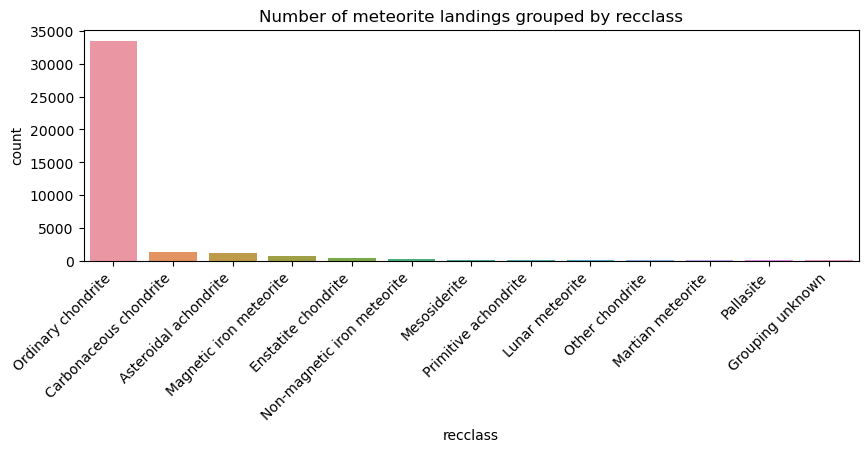

In [45]:
#bar plot
plt.figure(figsize=(10,3))
plt.title('Number of meteorite landings grouped by recclass')
sns.barplot(data=recclass_counts, x='recclass', y='count')
plt.xlabel('recclass')
plt.ylabel('count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [46]:
#average mass by recclass
avg_mass = df.groupby('recclass')['mass(kg)'].mean(numeric_only=True).sort_values(ascending=False).reset_index()
avg_mass

,recclass,mass(kg)
0,Non-magnetic iron meteorite,598.76
1,Magnetic iron meteorite,497.44
2,Pallasite,192.09
3,Mesosiderite,44.86
4,Grouping unknown,9.60
5,Asteroidal achondrite,4.67
6,Carbonaceous chondrite,2.69
7,Ordinary chondrite,1.56
8,Martian meteorite,1.53
9,Enstatite chondrite,0.79


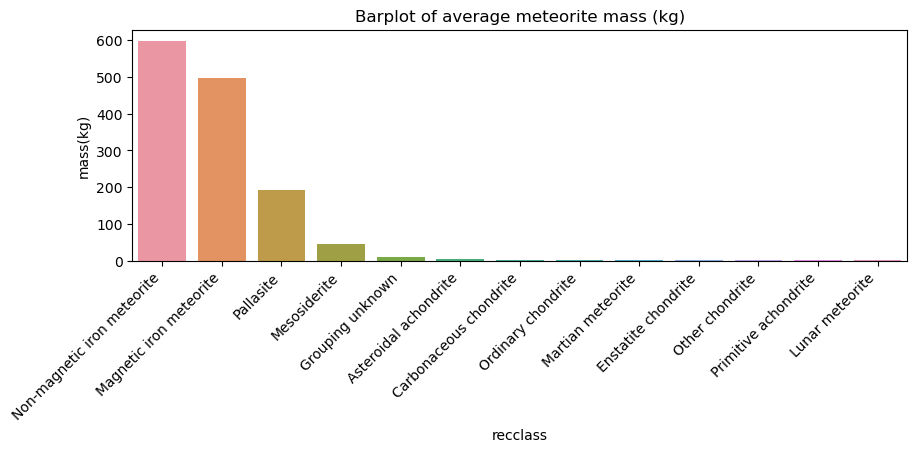

In [47]:
#bar plot of avg mass by recclass
plt.figure(figsize=(10,3))
plt.title('Barplot of average meteorite mass (kg)')
sns.barplot(data=avg_mass, x='recclass', y='mass(kg)')
plt.xlabel('recclass')
plt.ylabel('mass(kg)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [48]:
no_meteorite_by_continent = df.value_counts('continent').reset_index()
no_meteorite_by_continent

,continent,count
0,Antartica,22097
1,Africa,9027
2,Asia,3458
3,North America,1816
4,Oceania,642
5,South America,534
6,Europe,519
7,Unknown,3


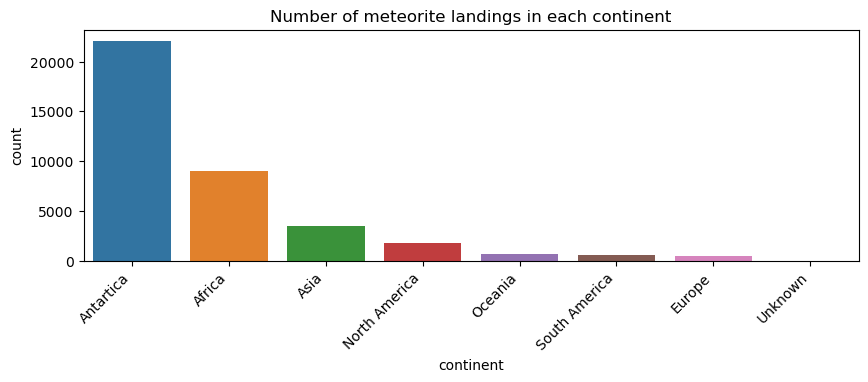

In [49]:
#bar plot of number of meteorite landings by continent
plt.figure(figsize=(10,3))
plt.title('Number of meteorite landings in each continent')
sns.barplot(data=no_meteorite_by_continent, x='continent', y='count')
plt.xlabel('continent')
plt.ylabel('count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [50]:
#count of each type of meteorite in each continent
continent_count = df.groupby('recclass')[['continent']].value_counts().reset_index()
continent_count

,recclass,continent,count
0,Asteroidal achondrite,Antartica,541
1,Asteroidal achondrite,Africa,461
2,Asteroidal achondrite,Asia,87
3,Asteroidal achondrite,Europe,30
4,Asteroidal achondrite,North America,30
5,Asteroidal achondrite,Oceania,28
6,Asteroidal achondrite,South America,8
7,Carbonaceous chondrite,Africa,582
8,Carbonaceous chondrite,Antartica,568
9,Carbonaceous chondrite,North America,37


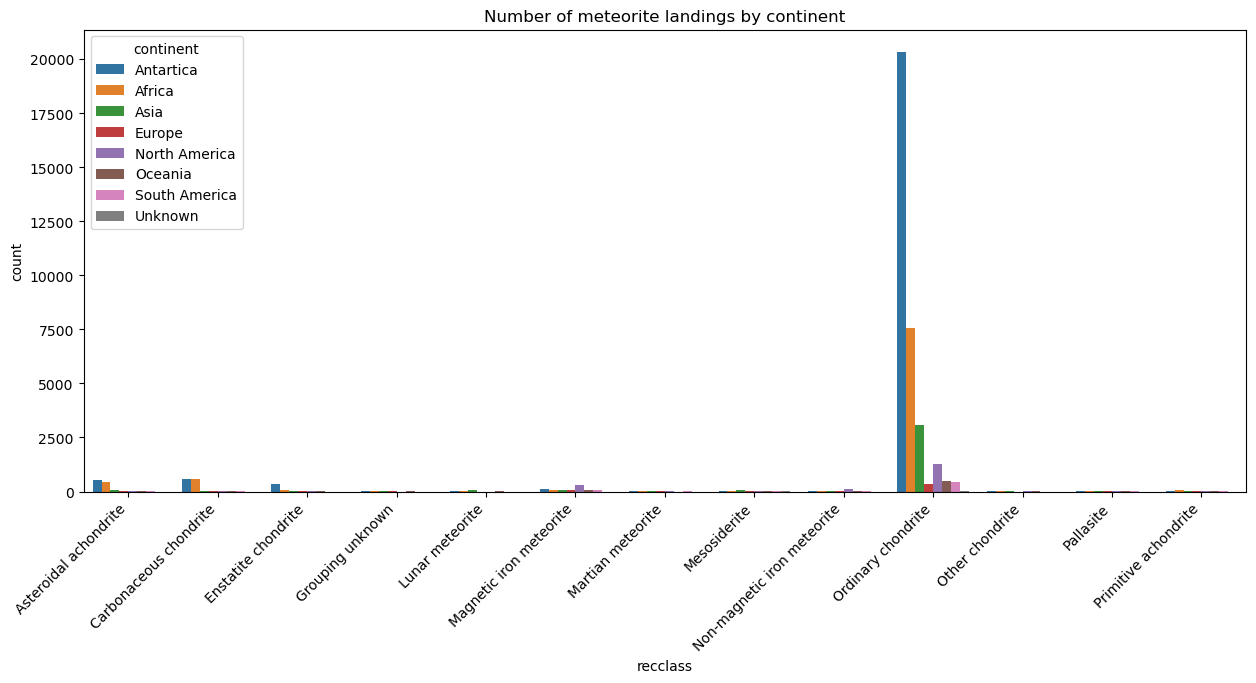

In [51]:
#bar plot of number of meteorite landings grouped by recclass by continent
plt.figure(figsize=(15,6))
plt.title('Number of meteorite landings by continent')
sns.barplot(data=continent_count, x='recclass', y='count', hue='continent')
plt.xlabel('recclass')
plt.ylabel('count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [52]:
recclass_by_continent = df.groupby(['recclass','continent']).agg({'mass(kg)':['mean','max']}).reset_index()
recclass_by_continent

recclass      continent mass(kg)         
                                                   mean      max
0         Asteroidal achondrite         Africa     7.26  3000.00
1         Asteroidal achondrite      Antartica     0.17     5.71
2         Asteroidal achondrite           Asia     1.99    42.00
3         Asteroidal achondrite         Europe     6.22    91.00
4         Asteroidal achondrite  North America    43.32  1100.00
5         Asteroidal achondrite        Oceania    14.04   330.00
6         Asteroidal achondrite  South America     5.81    23.50
7        Carbonaceous chondrite         Africa     1.09   114.00
8        Carbonaceous chondrite      Antartica     0.11    25.32
9        Carbonaceous chondrite           Asia     0.97    21.00
10       Carbonaceous chondrite         Europe    19.71   200.00
11       Carbonaceous chondrite  North America    55.66  2000.00
12       Carbonaceous chondrite        Oceania    13.57   118.00
13       Carbonaceous chondrite  South America     0.62     4.00
14          Enstatite chondrite         Africa     0.67    13.78
15          Enstatite chondrite      Antartica     0.04     2.43
16          Enstatite chondrite           Asia     1.91    13.60
17          Enstatite chondrite         Europe    16.89    27.00
18          Enstatite chondrite  North America    17.62   107.00
19          Enstatite chondrite        Oceania    11.11    40.00
20             Grouping unknown         Africa     1.05     1.42
21             Grouping unknown      Antartica     0.02     0.10
22             Grouping unknown           Asia    16.99   173.00
23             Grouping unknown         Europe     9.97    29.00
24             Grouping unknown        Oceania     1.64     1.64
25              Lunar meteorite         Africa     0.76    13.50
26              Lunar meteorite      Antartica     0.19     1.23
27              Lunar meteorite           Asia     0.17     5.53
28              Lunar meteorite        Oceania     0.03     0.04
29      Magnetic iron meteorite         Africa  1650.77 60000.00
30      Magnetic iron meteorite      Antartica     4.69   138.10
31      Magnetic iron meteorite           Asia   877.48 28000.00
32      Magnetic iron meteorite         Europe    82.61   626.00
33      Magnetic iron meteorite  North America   528.80 58200.00
34      Magnetic iron meteorite        Oceania   117.73  2000.00
35      Magnetic iron meteorite  South America   219.94  5360.00
36            Martian meteorite         Africa     1.52    18.00
37            Martian meteorite      Antartica     2.02    13.71
38            Martian meteorite           Asia     1.12     8.58
39            Martian meteorite         Europe     4.00     4.00
40            Martian meteorite  North America     0.80     0.80
41            Martian meteorite  South America     0.16     0.16
42                 Mesosiderite         Africa     4.33    73.30
43                 Mesosiderite      Antartica     0.76    10.02
44                 Mesosiderite           Asia    29.54   888.60
45                 Mesosiderite         Europe    33.17    59.00
46                 Mesosiderite  North America    59.72   320.00
47                 Mesosiderite        Oceania    81.00   272.00
48                 Mesosiderite  South America  1914.02  3828.00
49                 Mesosiderite        Unknown     1.20     1.20
50  Non-magnetic iron meteorite         Africa    16.01   275.00
51  Non-magnetic iron meteorite      Antartica     2.15    19.07
52  Non-magnetic iron meteorite           Asia   753.65  9500.00
53  Non-magnetic iron meteorite         Europe   141.11  1500.00
54  Non-magnetic iron meteorite  North America   349.01 30000.00
55  Non-magnetic iron meteorite        Oceania  2224.49 24000.00
56  Non-magnetic iron meteorite  South America  3595.20 50000.00
57           Ordinary chondrite         Africa     0.90   240.00
58           Ordinary chondrite      Antartica     0.15   407.00
59           Ordinary chondrite           Asia     4.39  4

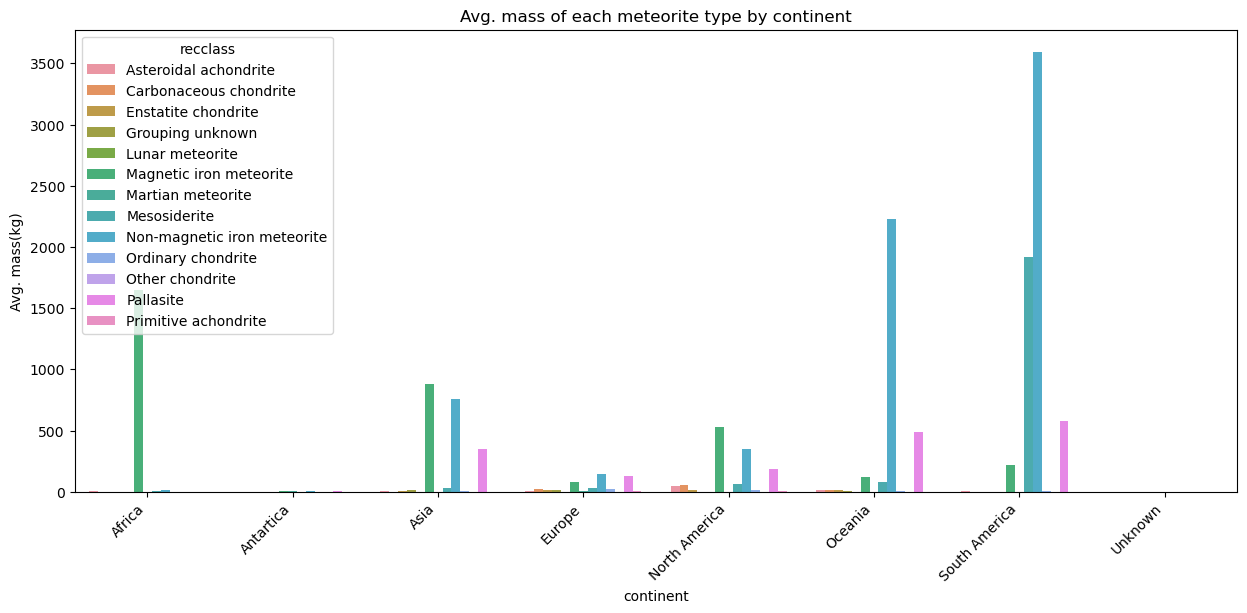

In [53]:
#bar plot of number of avg. mass of each type of meteorites grouped by continent
plt.figure(figsize=(15,6))
plt.title('Avg. mass of each meteorite type by continent')
sns.barplot(data=recclass_by_continent, x='continent', y=('mass(kg)', 'mean'), hue='recclass')
plt.xlabel('continent')
plt.ylabel('Avg. mass(kg)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [54]:
year_top_10 = df.value_counts('year').sort_values(ascending=False).reset_index().head(10)
year_top_10

,year,count
0,1979.00,3044
1,1988.00,2295
2,1998.00,2147
3,2003.00,1753
4,2006.00,1614
5,1999.00,1592
6,1990.00,1506
7,1997.00,1505
8,2000.00,1502
9,2009.00,1490


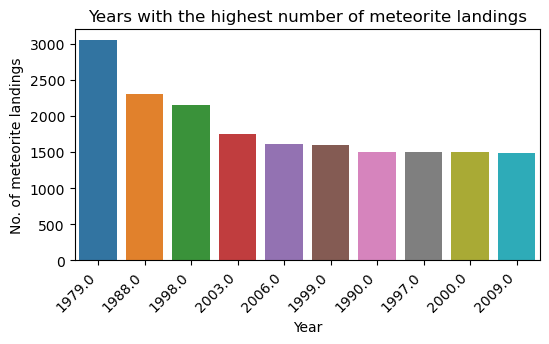

In [55]:
#bar plot of the top 10 years with the highest meteorite landings
plt.figure(figsize=(6,3))
plt.title('Years with the highest number of meteorite landings')
sns.barplot(data=year_top_10, x='year', y='count', order=year_top_10.sort_values('count', ascending=False)['year'])
plt.xlabel('Year')
plt.ylabel('No. of meteorite landings')
plt.xticks(rotation=45, ha='right')
plt.show()